In [ ]:
!pip install pulp

# Problem 1

### Code


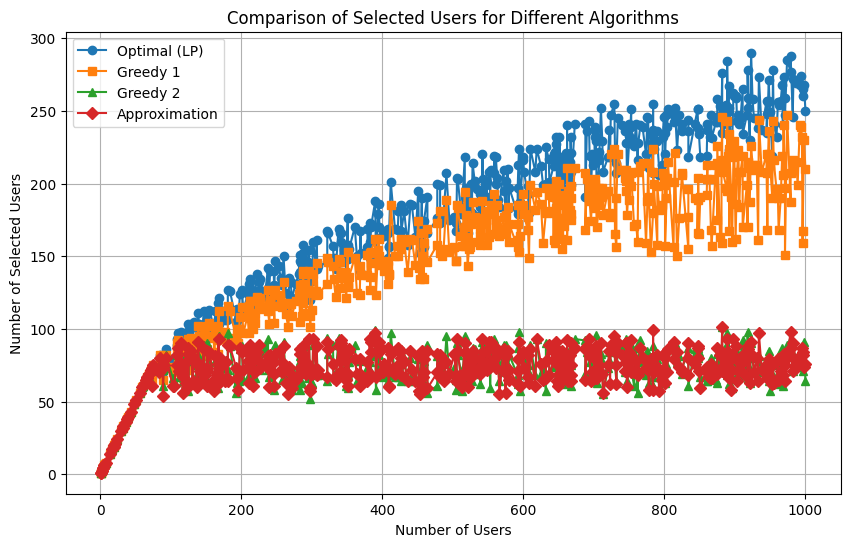

In [ ]:
import pulp as lp
import random
import matplotlib.pyplot as plt

def solve_resource_allocation_lp(num_users, total_available_bw, total_storage_capacity, users):
    model = lp.LpProblem("Resource_Allocation", lp.LpMaximize)
    users_selected = lp.LpVariable.dicts("User_Selected", range(num_users), cat=lp.LpBinary)
    model += lp.lpSum(users_selected[i] for i in range(num_users))
    model += lp.lpSum(users[i][0] * users_selected[i] for i in range(num_users)) <= total_available_bw
    model += lp.lpSum(users[i][1] * users_selected[i] for i in range(num_users)) <= total_storage_capacity
    model.solve()
    selected_users = [i for i in range(num_users) if users_selected[i].value() == 1]
    return selected_users

def greedy_algorithm_1(users, total_available_bw, total_storage_capacity):
    sorted_users = sorted(users, key=lambda x: x[1] / x[0], reverse=True)
    selected_users = []
    bw_used, storage_used = 0, 0

    for user in sorted_users:
        if bw_used + user[0] <= total_available_bw and storage_used + user[1] <= total_storage_capacity:
            selected_users.append(user)
            bw_used += user[0]
            storage_used += user[1]

    return selected_users

def greedy_algorithm(users, total_available_bw, total_storage_capacity):
    sorted_users = sorted(users, key=lambda x: x[1], reverse=True)
    selected_users = []
    bw_used, storage_used = 0, 0

    for user in sorted_users:
        if bw_used + user[0] <= total_available_bw and storage_used + user[1] <= total_storage_capacity:
            selected_users.append(user)
            bw_used += user[0]
            storage_used += user[1]

    return selected_users

def approximation_algorithm(users, total_available_bw, total_storage_capacity):
    selected_users = []
    bw_used, storage_used = 0, 0

    random.shuffle(users)

    for user in users:
        if bw_used + user[0] <= total_available_bw and storage_used + user[1] <= total_storage_capacity:
            selected_users.append(user)
            bw_used += user[0]
            storage_used += user[1]

    return selected_users

# Example usage for 500 iterations
random.seed(42)  # For reproducibility
total_iterations = 500
results_llp = []
results_greedy_1 = []
results_greedy_2 = []
results_approximation = []

for _ in range(total_iterations):
    num_users = random.randint(1, 1000)
    total_available_bw = random.randint(20000, 30000)
    total_storage_capacity = random.randint(10000, 20000)
    users = [(random.randint(1, 700), random.randint(1, 100)) for _ in range(num_users)]

    # Linear programming results
    selected_users_lp = solve_resource_allocation_lp(num_users, total_available_bw, total_storage_capacity, users)
    total_selected_bw_lp = sum(users[i][0] for i in selected_users_lp)
    total_selected_data_lp = sum(users[i][1] for i in selected_users_lp)

    # Greedy approach 1 results
    selected_users_greedy_1 = greedy_algorithm_1(users, total_available_bw, total_storage_capacity)
    total_selected_bw_greedy_1 = sum(user[0] for user in selected_users_greedy_1)
    total_selected_data_greedy_1 = sum(user[1] for user in selected_users_greedy_1)

    # Greedy approach 2 results
    selected_users_greedy_2 = greedy_algorithm(users, total_available_bw, total_storage_capacity)
    total_selected_bw_greedy_2 = sum(user[0] for user in selected_users_greedy_2)
    total_selected_data_greedy_2 = sum(user[1] for user in selected_users_greedy_2)

    # Approximation algorithm results
    selected_users_approximation = approximation_algorithm(users, total_available_bw, total_storage_capacity)
    total_selected_bw_approximation = sum(user[0] for user in selected_users_approximation)
    total_selected_data_approximation = sum(user[1] for user in selected_users_approximation)

    results_greedy_1.append([num_users, total_available_bw, total_storage_capacity, len(selected_users_greedy_1), total_selected_bw_greedy_1, total_selected_data_greedy_1])
    results_llp.append([num_users, total_available_bw, total_storage_capacity, len(selected_users_lp), total_selected_bw_lp, total_selected_data_lp])
    results_greedy_2.append([num_users, total_available_bw, total_storage_capacity, len(selected_users_greedy_2), total_selected_bw_greedy_2, total_selected_data_greedy_2])
    results_approximation.append([num_users, total_available_bw, total_storage_capacity, len(selected_users_approximation), total_selected_bw_approximation, total_selected_data_approximation])

# Calculate average selected users
results_llp = sorted(results_llp, key=lambda x: x[0])
results_greedy_1 = sorted(results_greedy_1, key=lambda x: x[0])
results_greedy_2 = sorted(results_greedy_2, key=lambda x: x[0])
results_approximation = sorted(results_approximation, key=lambda x: x[0])

# Plotting results
num_users = [res[0] for res in results_llp]
selected_users_lp = [res[3] for res in results_llp]
selected_users_greedy1 = [res[3] for res in results_greedy_1]
selected_users_greedy2 = [res[3] for res in results_greedy_2]
selected_users_approximation = [res[3] for res in results_approximation]

plt.figure(figsize=(10, 6))
plt.plot(num_users, selected_users_lp, label="Optimal (LP)", marker='o', linestyle='-')
plt.plot(num_users, selected_users_greedy1, label="Greedy 1", marker='s', linestyle='-')
plt.plot(num_users, selected_users_greedy2, label="Greedy 2", marker='^', linestyle='-')
plt.plot(num_users, selected_users_approximation, label="Approximation", marker='D', linestyle='-')

plt.xlabel('Number of Users')
plt.ylabel('Number of Selected Users')
plt.title('Comparison of Selected Users for Different Algorithms')
plt.grid(True)
plt.legend()
plt.show()


## Plotting

### #Users vs #selected_users

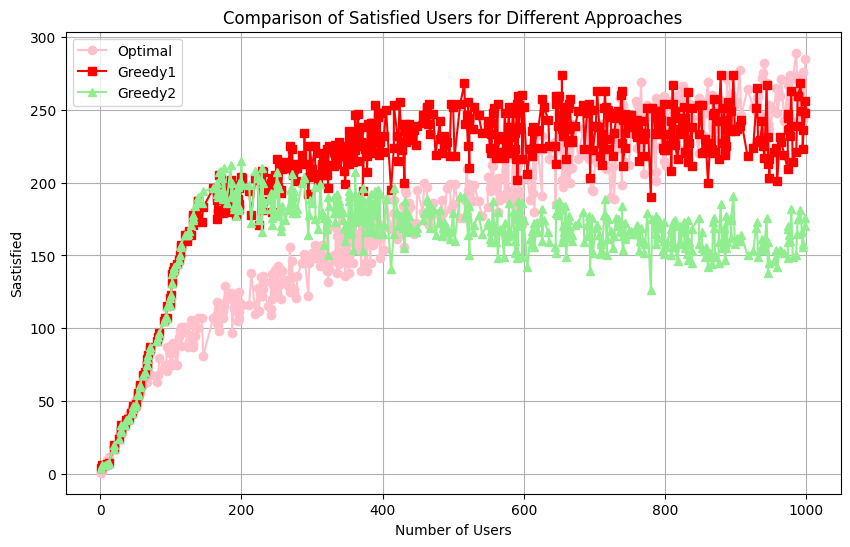

In [ ]:
import matplotlib.pyplot as plt

num_users = [res[0] for res in results_llp]
selected_users_lp = [res[3] for res in results_llp]
selected_users_greedy1 = [res[3] for res in results_greedy_1]
selected_users_greedy2 = [res[3] for res in results_greedy_2]

# Create the plot with continuous lines
plt.figure(figsize=(10, 6))
plt.plot(num_users, selected_users_lp, label="Optimal", marker='o', linestyle='-',color='pink')
plt.plot(num_users, selected_users_greedy1, label="Greedy1", marker='s', linestyle='-',color='red')
plt.plot(num_users, selected_users_greedy2, label="Greedy2", marker='^', linestyle='-',color='lightgreen')
plt.xlabel("Number of Users")
plt.ylabel("Sastisfied")
plt.title("Comparison of Satisfied Users for Different Approaches")
plt.grid(True)
plt.legend()
plt.show()


### #Users vs selected_data

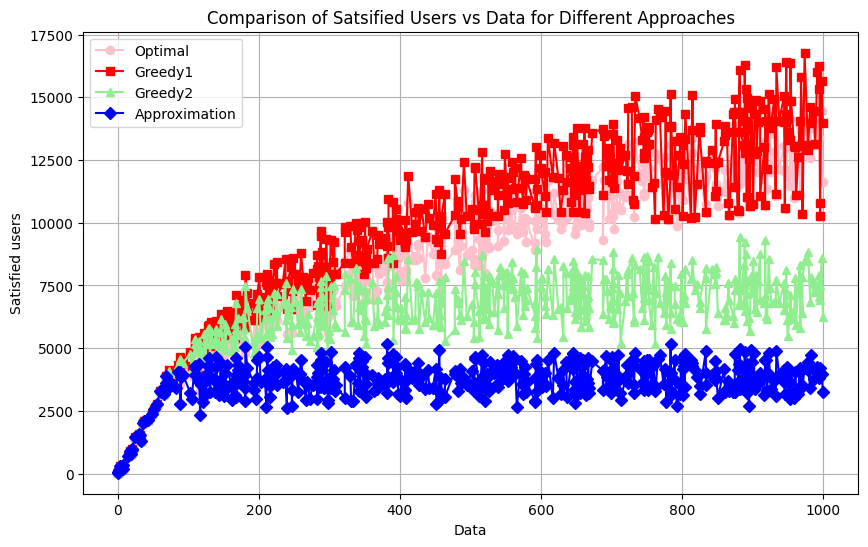

In [ ]:
import matplotlib.pyplot as plt

num_users = [res[0] for res in results_llp]
selected_users_lp = [res[5] for res in results_llp]
selected_users_greedy1 = [res[5] for res in results_greedy_1]
selected_users_greedy2 = [res[5] for res in results_greedy_2]
selected_users_approximation = [res[5] for res in results_approximation]  # Assuming results_approximation contains data for the approximation algorithm

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(num_users, selected_users_lp, label="Optimal", marker='o', color='pink')
plt.plot(num_users, selected_users_greedy1, label="Greedy1", marker='s', color='red')
plt.plot(num_users, selected_users_greedy2, label="Greedy2", marker='^', color='lightgreen')
plt.plot(num_users, selected_users_approximation, label="Approximation", marker='D', color='blue')  # Add the approximation algorithm
plt.xlabel("Data")
plt.ylabel("Satisfied users")
plt.title("Comparison of Satsified Users vs Data for Different Approaches")
plt.grid(True)
plt.legend()
plt.show()


### #Users vs selected_BW

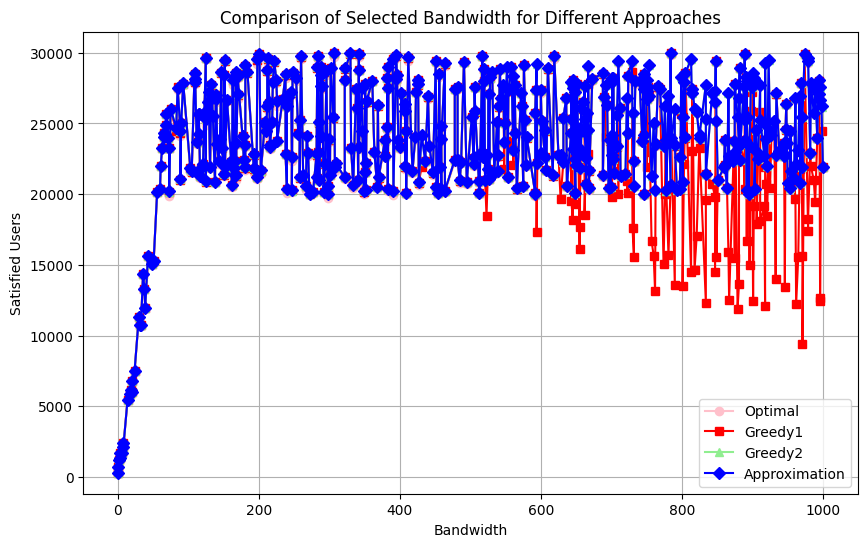

In [ ]:
import matplotlib.pyplot as plt

num_users = [res[0] for res in results_llp]
selected_bw_lp = [res[4] for res in results_llp]
selected_bw_greedy1 = [res[4] for res in results_greedy_1]
selected_bw_greedy2 = [res[4] for res in results_greedy_2]
selected_bw_approximation = [res[4] for res in results_approximation]  # Assuming results_approximation contains data for the approximation algorithm

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(num_users, selected_bw_lp, label="Optimal", marker='o', color='pink')
plt.plot(num_users, selected_bw_greedy1, label="Greedy1", marker='s', color='red')
plt.plot(num_users, selected_bw_greedy2, label="Greedy2", marker='^', color='lightgreen')
plt.plot(num_users, selected_bw_approximation, label="Approximation", marker='D', color='blue')  # Add the approximation algorithm
plt.xlabel("Bandwidth")
plt.ylabel("Satisfied Users")
plt.title("Comparison of Selected Bandwidth for Different Approaches")
plt.grid(True)
plt.legend()
plt.show()


# Problem 2

## Code

In [ ]:
import random

def greedy_algorithm_1(users, uavs):
    # Sort users based on the ratio of data storage requirement to bandwidth
    sorted_users = sorted(users, key=lambda x: x[1] / x[0], reverse=True)
    selected_users = []
    bw_used, storage_used = [0] * len(uavs), [0] * len(uavs)

    for user in sorted_users:
        for i, uav in enumerate(uavs):
            if bw_used[i] + user[0] <= uav["bw"] and storage_used[i] + user[1] <= uav["storage"]:
                selected_users.append(user)
                bw_used[i] += user[0]
                storage_used[i] += user[1]
                break

    return selected_users

random.seed(42)  # For reproducibility
total_iterations = 500
results_greedy_1 = []

for _ in range(total_iterations):
    num_users = random.randint(1, 1500)
    num_uavs = random.randint(1, 20)
    uavs = [
        {"bw": random.randint(5000, 10000), "storage": random.randint(1000, 2000)}
        for _ in range(10)
    ]
    users = [(random.randint(1, 700), random.randint(1, 100)) for _ in range(num_users)]

    # Custom greedy results
    selected_users_custom = greedy_algorithm_1(users, uavs)
    total_selected_bw_custom = sum(user[0] for user in selected_users_custom)
    total_selected_data_custom = sum(user[1] for user in selected_users_custom)
    results_greedy_1.append([num_users, num_uavs, uavs, len(selected_users_custom), total_selected_bw_custom, total_selected_data_custom])

# Print the results
results_greedy_1 = sorted(results_greedy_1, key = lambda x: x[0])


In [ ]:
import random

def greedy_algorithm_2(users, uavs):
    sorted_users = sorted(users, key=lambda x: x[1], reverse=True)
    selected_users = []
    bw_used, storage_used = [0] * len(uavs), [0] * len(uavs)

    for user in sorted_users:
        for i, uav in enumerate(uavs):
            if bw_used[i] + user[0] <= uav["bw"] and storage_used[i] + user[1] <= uav["storage"]:
                selected_users.append(user)
                bw_used[i] += user[0]
                storage_used[i] += user[1]
                break

    return selected_users

random.seed(42)
total_iterations = 500
results_greedy_2 = []

for _ in range(total_iterations):
    num_users = random.randint(1, 1500)
    num_uavs = random.randint(1, 20)
    uavs = [
        {"bw": random.randint(5000, 10000), "storage": random.randint(1000, 2000)}
        for _ in range(10)
    ]
    users = [(random.randint(1, 700), random.randint(1, 100)) for _ in range(num_users)]

    selected_users_custom = greedy_algorithm_2(users, uavs)
    total_selected_bw_custom = sum(user[0] for user in selected_users_custom)
    total_selected_data_custom = sum(user[1] for user in selected_users_custom)
    results_greedy_2.append([num_users, num_uavs, uavs, len(selected_users_custom), total_selected_bw_custom, total_selected_data_custom])

results_greedy_2 = sorted(results_greedy_2, key = lambda x: x[0])


## Plots

### #Users vs #selected_users

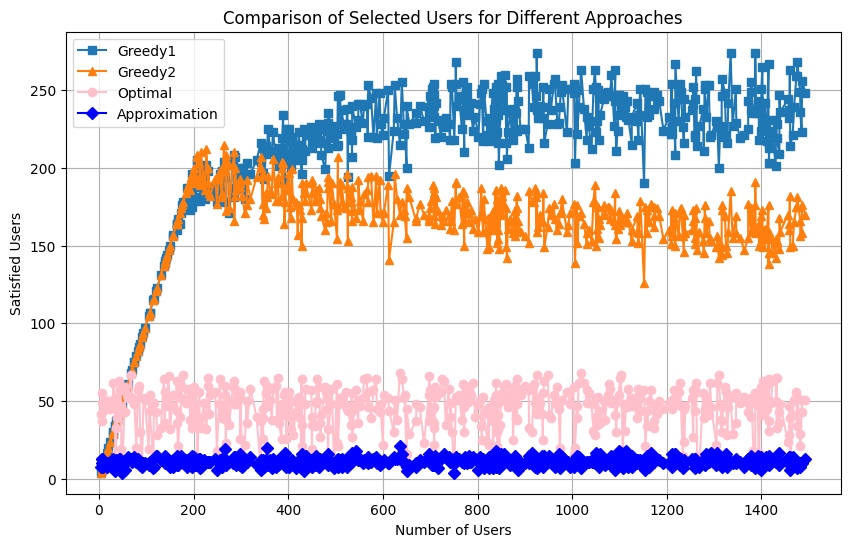

In [ ]:
import matplotlib.pyplot as plt

num_users = [res[0] for res in results_greedy_1]
selected_users_greedy1 = [res[3] for res in results_greedy_1]
selected_users_greedy2 = [res[3] for res in results_greedy_2]
selected_users_lp = [res[3] for res in results_lp]  # New line for optimal
selected_users_approximation = [res[3] for res in results_approximation]  # New line for approximation

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(num_users, selected_users_greedy1, label="Greedy1", marker='s')
plt.plot(num_users, selected_users_greedy2, label="Greedy2", marker='^')
plt.plot(num_users, selected_users_lp, label="Optimal", marker='o', linestyle='-', color='pink')  # New line for optimal
plt.plot(num_users, selected_users_approximation, label="Approximation", marker='D', linestyle='-', color='blue')  # New line for approximation
plt.xlabel("Number of Users")
plt.ylabel("Satisfied Users")
plt.title("Comparison of Selected Users for Different Approaches")
plt.grid(True)
plt.legend()
plt.show()


### #Users vs selected_data

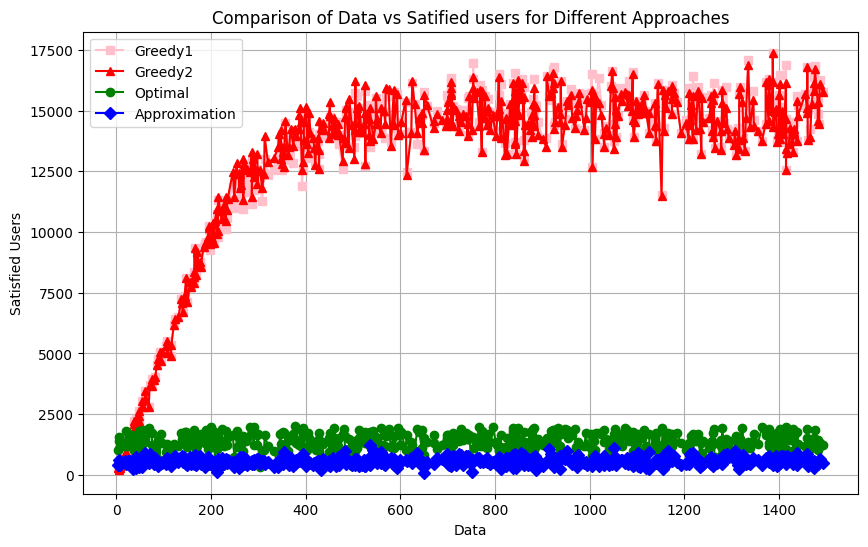

In [ ]:
import matplotlib.pyplot as plt

num_users = [res[0] for res in results_greedy_1]
selected_users_greedy1 = [res[5] for res in results_greedy_1]
selected_users_greedy2 = [res[5] for res in results_greedy_2]
selected_users_lp = [res[5] for res in results_lp]  # Selected BW for Optimal algorithm
selected_users_approximation = [res[5] for res in results_approximation]  # Selected BW for Approximation algorithm

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(num_users, selected_users_greedy1, label="Greedy1", marker='s', color='pink')
plt.plot(num_users, selected_users_greedy2, label="Greedy2", marker='^', color='red')
plt.plot(num_users, selected_users_lp, label="Optimal", marker='o', color='green')  # Optimal algorithm
plt.plot(num_users, selected_users_approximation, label="Approximation", marker='D', color='blue')  # Approximation algorithm
plt.xlabel("Data")
plt.ylabel("Satisfied Users")
plt.title("Comparison of Data vs Satified users for Different Approaches")
plt.grid(True)
plt.legend()
plt.show()


### #Users vs selected_BW

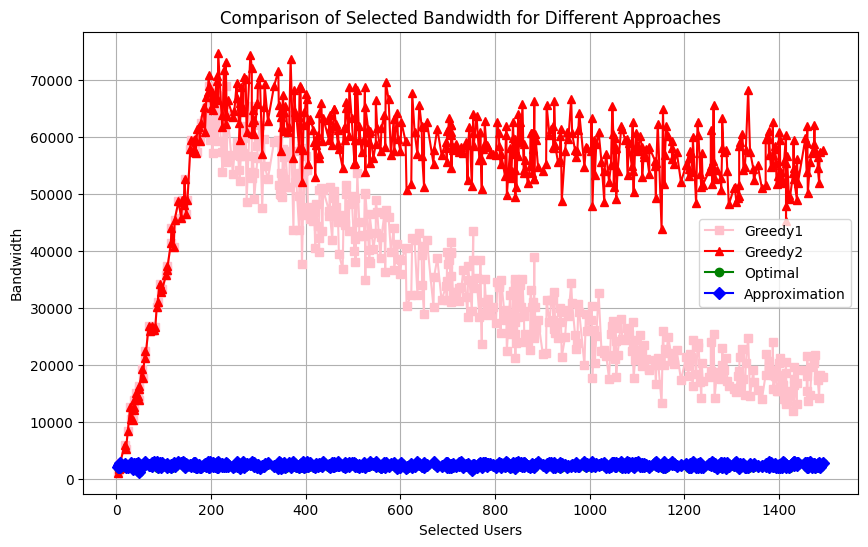

In [ ]:
import matplotlib.pyplot as plt

num_users = [res[0] for res in results_greedy_1]
selected_users_greedy1 = [res[4] for res in results_greedy_1]
selected_users_greedy2 = [res[4] for res in results_greedy_2]
selected_users_lp = [res[4] for res in results_lp]  # Selected BW for Optimal algorithm
selected_users_approximation = [res[4] for res in results_approximation]  # Selected BW for Approximation algorithm

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(num_users, selected_users_greedy1, label="Greedy1", marker='s', color='pink')
plt.plot(num_users, selected_users_greedy2, label="Greedy2", marker='^', color='red')
plt.plot(num_users, selected_users_lp, label="Optimal", marker='o', color='green')  # Optimal algorithm
plt.plot(num_users, selected_users_approximation, label="Approximation", marker='D', color='blue')  # Approximation algorithm
plt.xlabel("Selected Users")
plt.ylabel("Bandwidth")
plt.title("Comparison of Selected Bandwidth for Different Approaches")
plt.grid(True)
plt.legend()
plt.show()

